In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from highlight_text import ax_text, fig_text
from pypalettes import load_cmap
from pyfonts import load_google_font

In [2]:
gdf = gpd.read_file('https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=BOUWJAAR&THEMA=bouwjaar')

# Creating period of construction categorical labels and adding as a new column to the dataframe
bins = [0, 1859, 1900, 1919, 1939, 1959, 1979, 1999, 2019, float('inf')]
labels = ['Before 1860', '1860-1899', '1900-1919', '1920-1939', 
          '1940-1959', '1960-1979', '1980-1999',
          '2000-2019', '2020-Present']

gdf['period'] = pd.cut(gdf['Bouwjaar'], bins=bins, labels=labels)

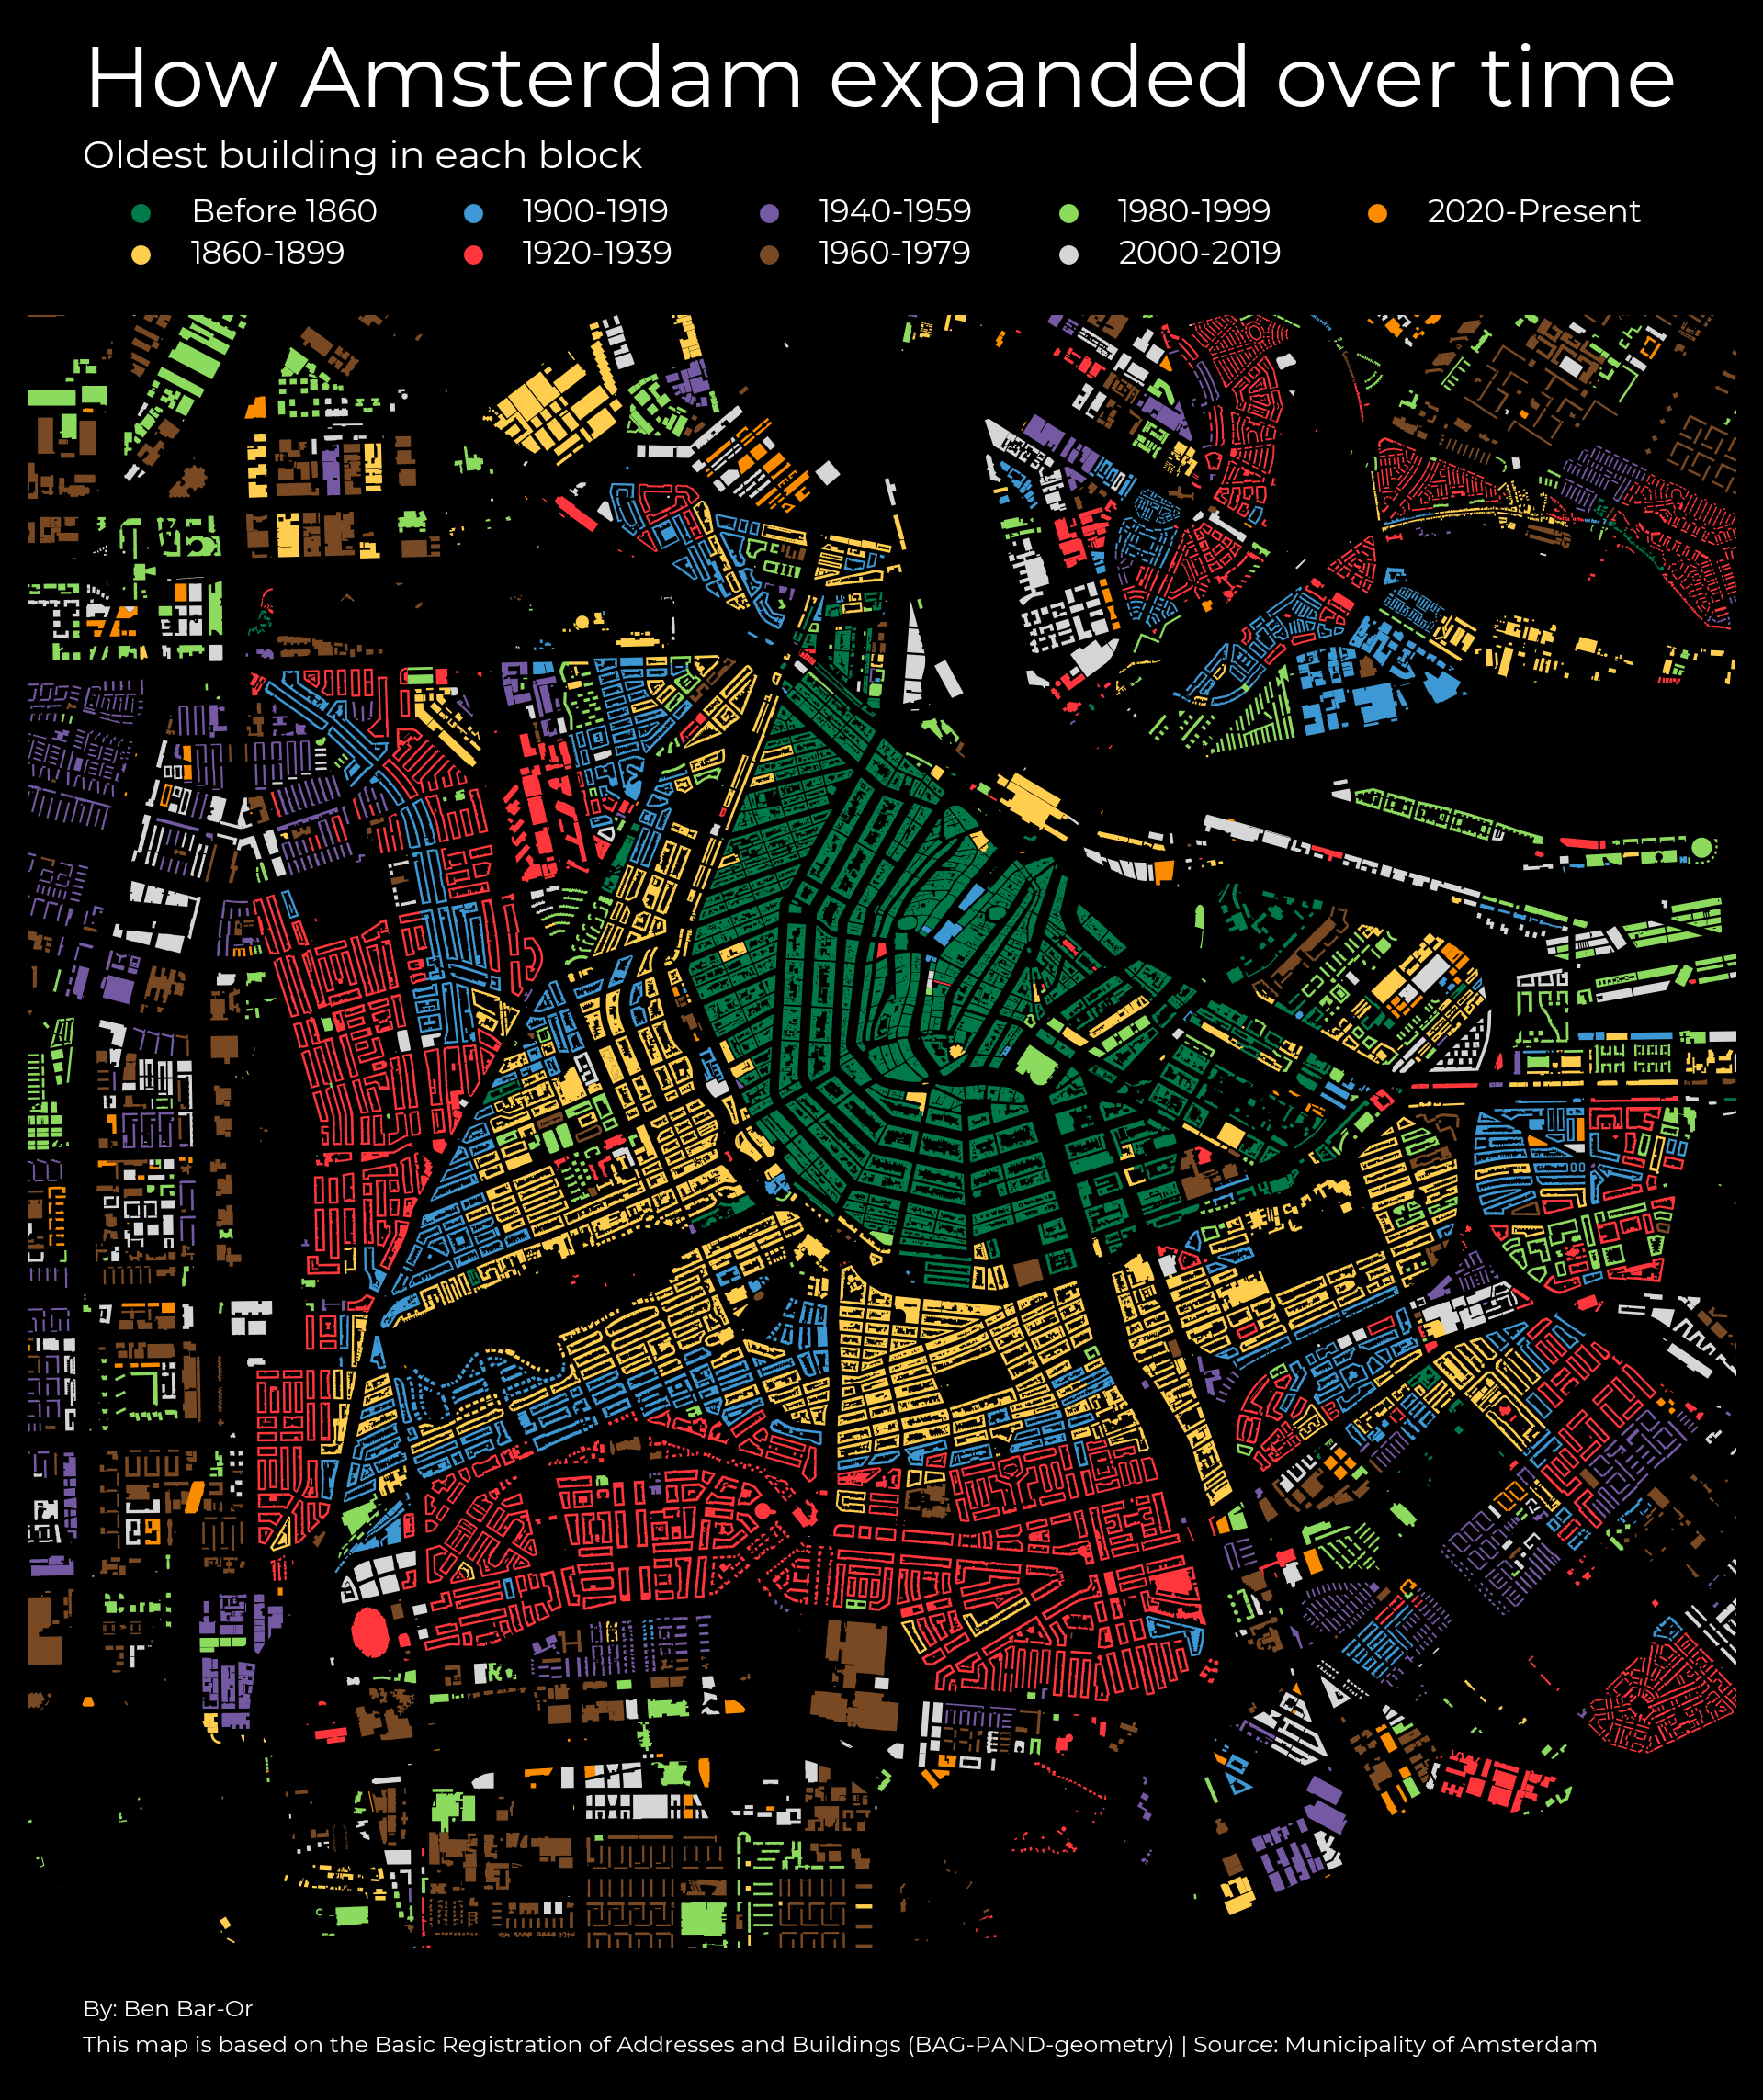

In [3]:
fig, ax = plt.subplots(dpi=300, figsize = (8,10))

cmap = load_cmap("mpalette")
font = load_google_font('Montserrat')

gdf.plot(column = 'period', linewidth = 0.8, zorder=2, cmap=cmap,
                             legend = True, 
                             legend_kwds={'loc':'center',
                                         'ncols': 5,
                                         'labelcolor':'white',
                                         'frameon': False,
                                         'bbox_to_anchor':(0.5, 1.05), 
                                         'markerscale':0.5, 
                                         'labelspacing':0.25,
                                         'handlelength': 1,
                                         'handleheight': 0,
                                         'alignment':'center'}, ax=ax)

# Adjustments to the legend's labels:
for text in ax.get_legend().get_texts():
    text.set_fontproperties(font)
    text.set_fontsize('small')

# Main title:
fig_text(x=0.15,y=0.89,
        s="How Amsterdam expanded over time", 
        font = font,
         weight = 'bold',
        color = 'white',
        fontsize = 22)
# Sub-title (also functioning as legend's title):
fig_text(x=0.15,y=0.855,
        s="Oldest building in each block", 
        font = font,
        color = 'white',
        fontsize = 10)

# Footer
fig_text(x= 0.15, y = 0.18,
         s= """By: Ben Bar-Or
This map is based on the Basic Registration of Addresses and Buildings (BAG-PAND-geometry) | Source: Municipality of Amsterdam""",
         font = font,
         color = 'white',
         fontsize = 6)

#Zooming in on the main part of the city:
ax.set_xlim(4.83,4.95)
ax.set_ylim(52.33,52.4)

ax.axis('off')
fig.set_facecolor('black')

#plt.savefig("amsterdam_dev.png", dpi = 300, bbox_inches = 'tight')
plt.show()